In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv("Mens_Boston_Marathon_Winners.csv")

In [75]:
df_cleaned = df.dropna()

In [76]:
df_longer = df_cleaned.melt(
    id_vars="Country",
    value_vars="Distance (KM)",
    var_name="Distances"
)

In [77]:
df_pivot = df_longer.pivot_table(
    index="Country",
    columns="Distances",
    aggfunc="sum"
)

In [78]:
df_stacked = df_pivot.stack().reset_index()

C:\Users\lazar\AppData\Local\Temp\ipykernel_12332\942521415.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_stacked = df_pivot.stack().reset_index()


In [79]:
df_sorted = df_stacked.sort_values(by='value', ascending=False)

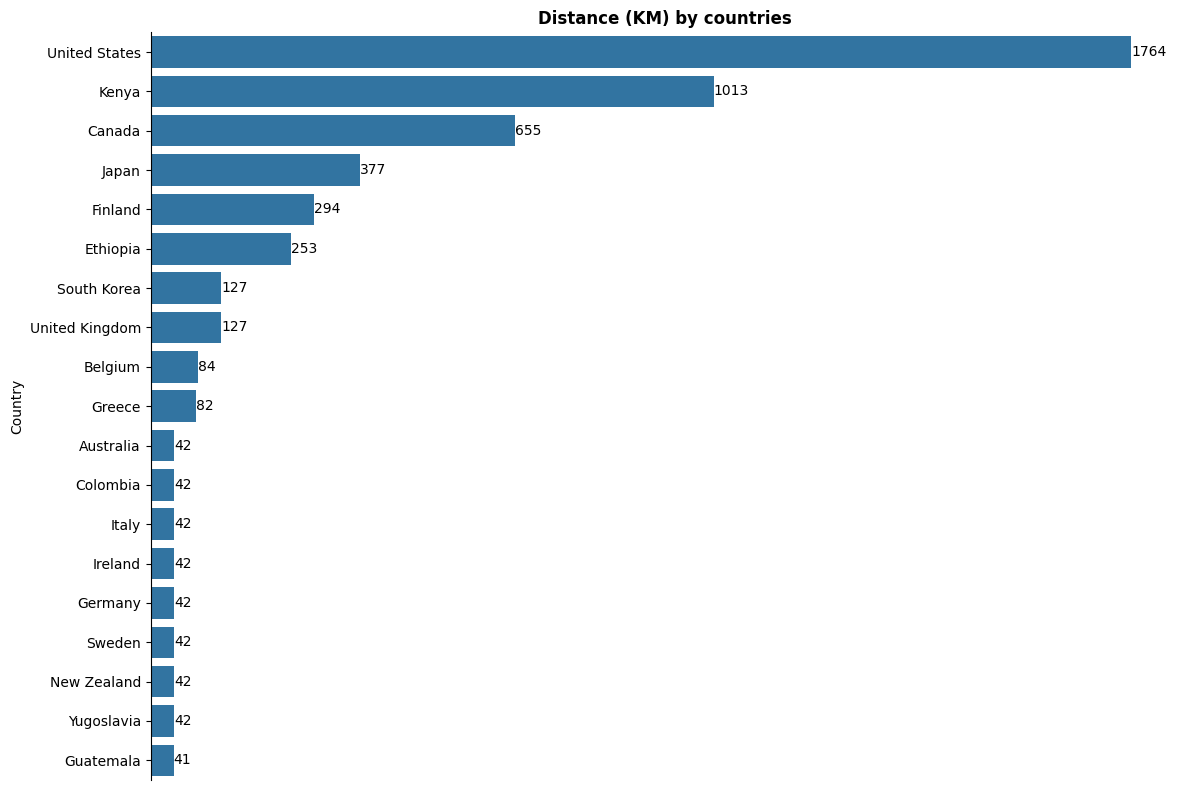

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    data=df_sorted,
    x="value",
    y="Country",
    ax=ax,
    orient='h',
)

ax.bar_label(ax.containers[0], fmt="%.0f")
ax.set_title("Distance (KM) by countries", fontweight="bold")
ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()